# This is a brief data visualisation and analysis of the countrywise per day data reguarding the number of covid-19 cases and deaths reported(till 22nd May ,2020).Thedata set is incomplete as the cororavirus outbreak is an ongoing pandemic. Hence the current analysis may not hold good in the future.

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv("may_23.csv")

In [4]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,23/05/2020,23,5,2020,540,12,Afghanistan,AF,AFG,37172386.0,Asia
1,22/05/2020,22,5,2020,531,6,Afghanistan,AF,AFG,37172386.0,Asia
2,21/05/2020,21,5,2020,492,9,Afghanistan,AF,AFG,37172386.0,Asia
3,20/05/2020,20,5,2020,581,5,Afghanistan,AF,AFG,37172386.0,Asia
4,19/05/2020,19,5,2020,408,4,Afghanistan,AF,AFG,37172386.0,Asia


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18830 entries, 0 to 18829
Data columns (total 11 columns):
dateRep                    18830 non-null object
day                        18830 non-null int64
month                      18830 non-null int64
year                       18830 non-null int64
cases                      18830 non-null int64
deaths                     18830 non-null int64
countriesAndTerritories    18830 non-null object
geoId                      18760 non-null object
countryterritoryCode       18578 non-null object
popData2018                18579 non-null float64
continentExp               18830 non-null object
dtypes: float64(1), int64(5), object(5)
memory usage: 1.6+ MB


In [5]:
df.drop(columns=["geoId","countryterritoryCode"],inplace =True)

In [6]:
df.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'popData2018', 'continentExp'],
      dtype='object')

In [7]:
world = df[["month","cases","deaths"]]

In [8]:
world.shape

(18830, 3)

In [9]:
world =world.groupby("month").sum().reset_index()
world.head(10)

,month,cases,deaths
0,1,9799,213
1,2,75397,2708
2,3,711045,34990
3,4,2336967,189419
4,5,2042241,110709
5,12,27,0


In [10]:
world["month"].replace(12,0, inplace=True)

In [11]:
world.sort_values("month", ascending =True, inplace=True)

In [12]:
def get_month(n):
    if n==1:
        return "Jan"
    if n==2:
        return "Feb"
    if n==3:
        return "Mar"
    if n==4:
        return "Apr"
    if n==5:
        return "May"
    if n==0:
        return "Dec"

In [13]:
world["M"] = world["month"].apply(get_month)
world.set_index("M")

,month,cases,deaths
M,,,
Dec,0,27,0
Jan,1,9799,213
Feb,2,75397,2708
Mar,3,711045,34990
Apr,4,2336967,189419
May,5,2042241,110709


In [14]:
%matplotlib notebook
plt.style.use("ggplot")

<IPython.core.display.Javascript object>


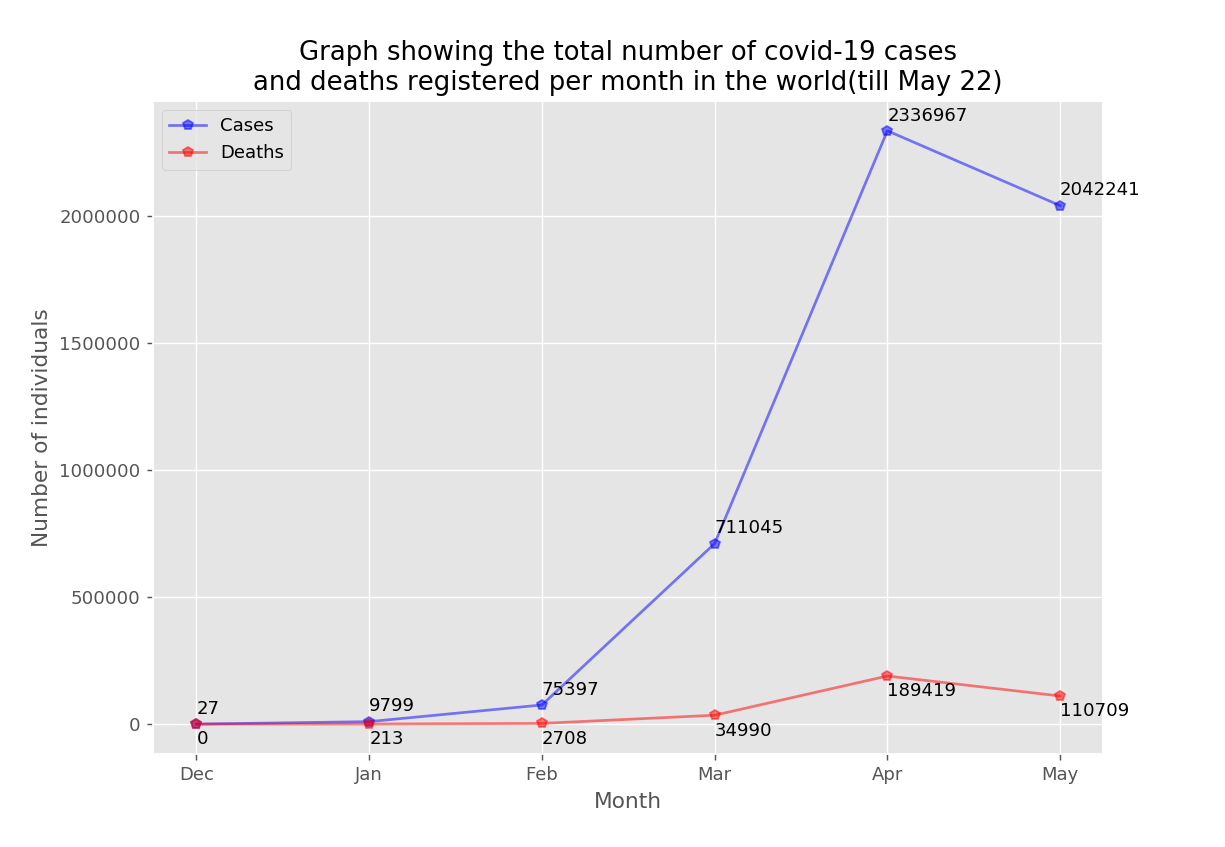

In [17]:
plt.plot(world["M"], world["cases"],color ="blue", marker="p", label = "Cases" ,alpha=0.5)
plt.plot(world["M"], world["deaths"],color ="red",marker = "p", label="Deaths" ,alpha=0.5)
for i,v in enumerate(world["cases"]):
    plt.text(i,v+40000, str(v))
for i,v in enumerate(world["deaths"]):
    plt.text(i,v-80000, str(v), fontsize=10)    
plt.legend()    
plt.title("Graph showing the total number of covid-19 cases\nand deaths registered per month in the world(till May 22)")
plt.xlabel("Month")
plt.ylabel("Number of individuals")
plt.show()

## It is clear that the growth in the number of cases as well as deaths were huge in April.

In [96]:
df.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'popData2018', 'continentExp'],
      dtype='object')

In [18]:
import numpy as np

In [19]:
a= np.array(df.groupby('countriesAndTerritories').sum().sort_values("cases", ascending =False)["cases"].head(12))

In [20]:
print(a)

[1601434  330890  326448  254195  234824  228658  177850  154500  144566
  131652  125101  111698]


<IPython.core.display.Javascript object>


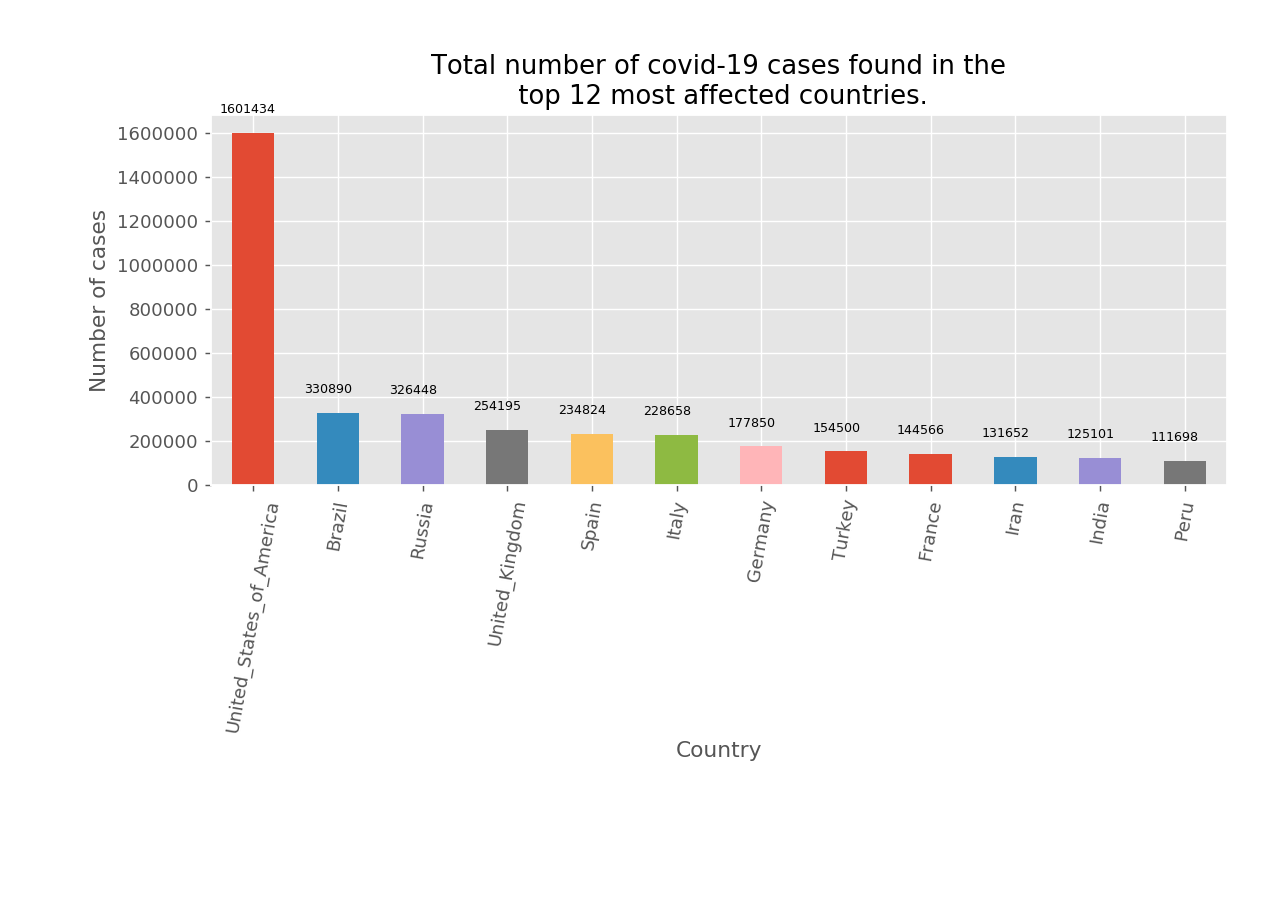

In [22]:
df.groupby('countriesAndTerritories').sum().sort_values("cases", ascending =False)["cases"].head(12).plot(kind ='bar')
plt.xlabel("Country")
plt.ylabel("Number of cases")
plt.title("Total number of covid-19 cases found in the\n top 12 most affected countries.")
plt.xticks(rotation = 80)
plt.tight_layout()

for index, values in enumerate(a):
    plt.text(index-0.4, values+90000,values, fontsize=7)

In [162]:
pop_dict={}

In [163]:
for i in range(df.shape[0]):
    pop_dict[str(df["countriesAndTerritories"][i])] = df["popData2018"][i]

In [166]:
len(pop_dict.values())

210

In [188]:
pm = df.groupby("countriesAndTerritories").sum()[["cases","deaths"]].reset_index()

In [189]:
def generate_pop(value):
    return(pop_dict[str(value)])

In [190]:
pm["population"]=pm["countriesAndTerritories"].apply(generate_pop)

In [193]:
pm = pm[pm['population']>=1000000]

In [199]:
pm["cpm"]= (pm["cases"]/pm["population"])*1000000

<IPython.core.display.Javascript object>


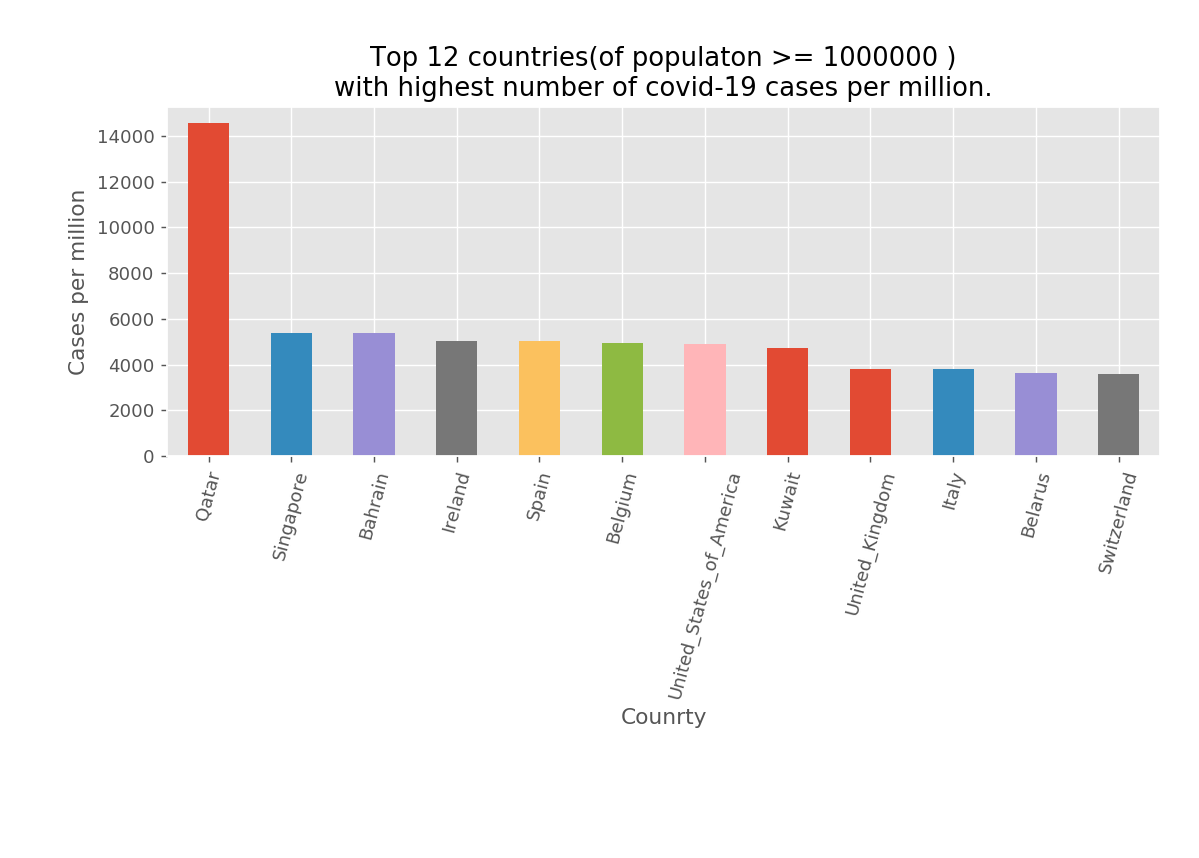

[]

In [211]:
pm.set_index("countriesAndTerritories").sort_values("cpm", ascending =False)["cpm"].head(12).plot(kind ="bar")
plt.xlabel("Counrty")
plt.ylabel("Cases per million")
plt.title("Top 12 countries(of populaton >= 1000000 )\nwith highest number of covid-19 cases per million.")
plt.xticks(rotation =75)
plt.tight_layout()
plt.plot()

In [212]:
df.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'popData2018', 'continentExp'],
      dtype='object')

In [233]:
colors = ["green", "gold", "blue","pink","red","black"]

In [247]:
explode=[0,0.1,0.2,0.1,0.3,0.7]

In [241]:
countries=np.array(df.groupby("continentExp").sum()["cases"].index)
data = np.array(df.groupby("continentExp").sum()["cases"].values)

<IPython.core.display.Javascript object>


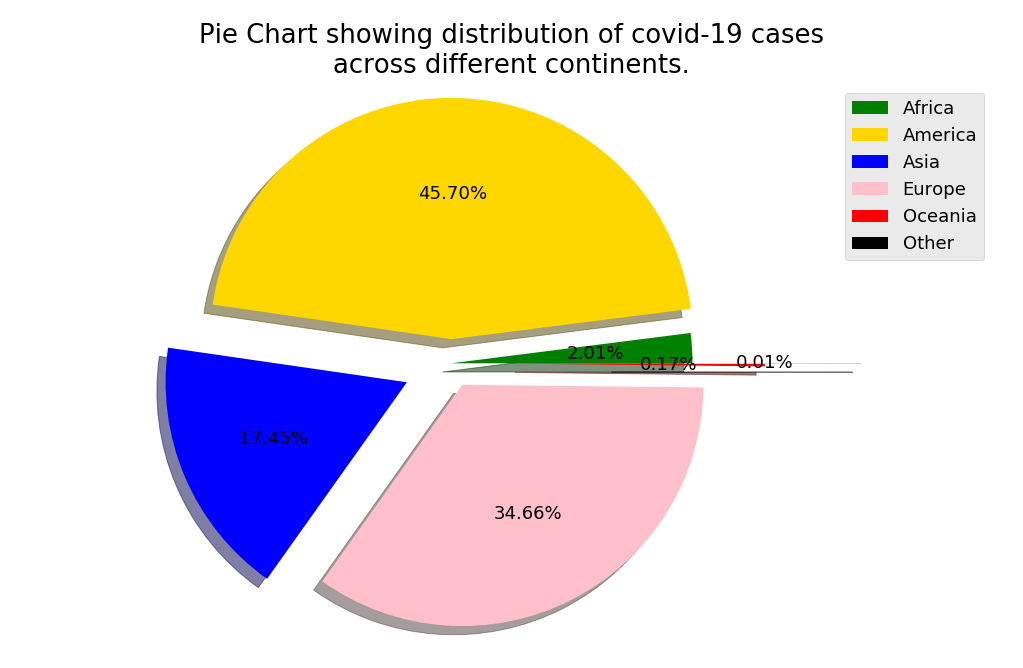

In [252]:
plt.pie(data,explode = explode, shadow =True, colors = colors, autopct = "%.2f%%")
plt.axis('equal')
plt.title("Pie Chart showing distribution of covid-19 cases\nacross different continents.")
plt.legend(countries, loc ="best")
plt.tight_layout()
plt.show()

In [9]:
df.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2018', 'continentExp'],
      dtype='object')

In [23]:
us = df[df["countriesAndTerritories"]=='United_States_of_America']

In [24]:
ar = np.arange(0,us.shape[0])

In [25]:
us["ar"]=ar

C:\Users\Sritiman Adak\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
us = us[["cases","month","ar"]].sort_values("ar", ascending =False)

In [27]:
us["ar"]=ar

In [28]:
br = df[df["countriesAndTerritories"]=='Brazil']
br["ar"]=ar
br = br[["cases","month","ar"]].sort_values("ar", ascending =False)
br["ar"]=ar

C:\Users\Sritiman Adak\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
ru = df[df["countriesAndTerritories"]=='Russia']
ru["ar"]=ar
ru = ru[["cases","month","ar"]].sort_values("ar", ascending =False)
ru["ar"]=ar

C:\Users\Sritiman Adak\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
plt.style.use("ggplot")
%matplotlib notebook

<IPython.core.display.Javascript object>


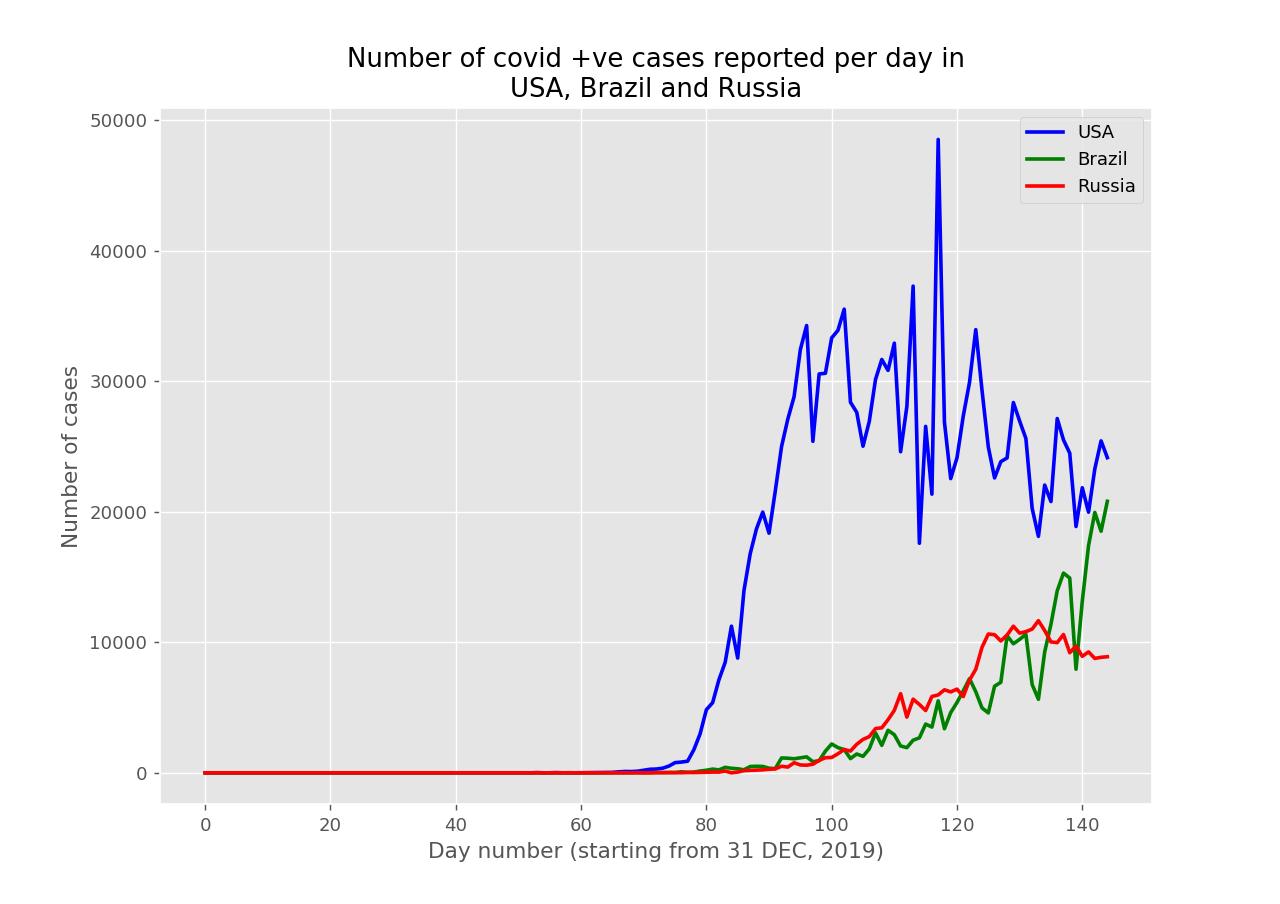

In [36]:
plt.plot(us["ar"],us["cases"], color = "blue", label = "USA",aa=True ,linewidth = 2)
plt.plot(br["ar"],br["cases"], color ="green", label= "Brazil", linewidth = 2)
plt.plot(ru["ar"],ru["cases"], color ="red", label = "Russia", linewidth = 2)
plt.title("Number of covid +ve cases reported per day in\nUSA, Brazil and Russia")
plt.xlabel("Day number (starting from 31 DEC, 2019)")
plt.ylabel("Number of cases")
plt.legend()
plt.show()

## from the above graph it is noticed that, daily number of cases are falling in USA and Russia but it is increasing exponentially in Brazil.

In [64]:
a= np.array(df.groupby("countriesAndTerritories").sum().sort_values("deaths", ascending = False).head(12)['deaths'])

<IPython.core.display.Javascript object>


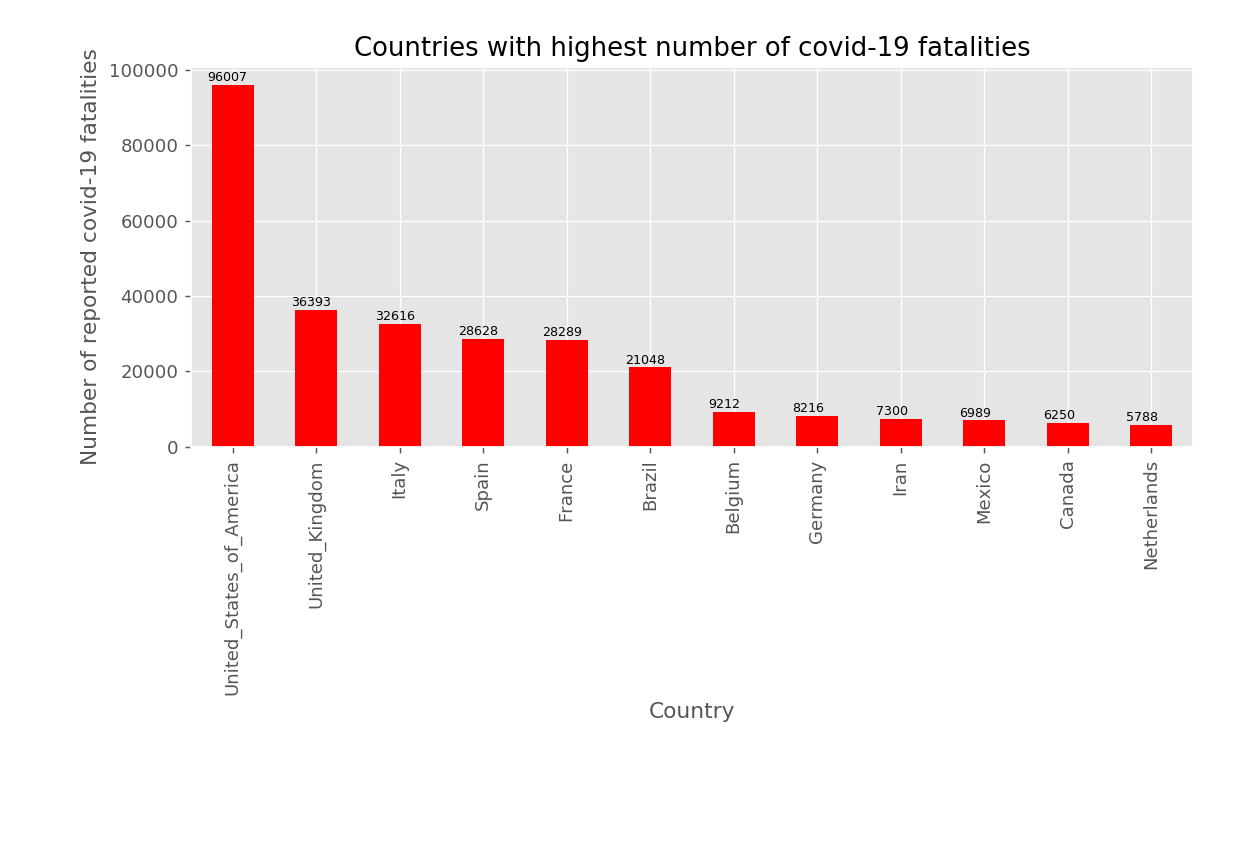

In [68]:
df.groupby("countriesAndTerritories").sum().sort_values("deaths", ascending = False).head(12)['deaths'].plot(kind ="bar", color = "red")
plt.xlabel("Country")
plt.ylabel("Number of reported covid-19 fatalities")
plt.title("Countries with highest number of covid-19 fatalities")
for i, v in enumerate(a):
    plt.text(i-.3,v+1000,str(v), fontsize=7)
plt.tight_layout()
plt.show()

In [73]:
asia = df[df["continentExp"]=="Asia"][["month","deaths"]]
africa = df[df["continentExp"]=="Africa"][["month","deaths"]]
europe= df[df["continentExp"]=="Europe"][["month","deaths"]]
america = df[df["continentExp"]=="America"][["month","deaths"]]

In [74]:
asia = asia.groupby("month").sum().reset_index()
africa = africa.groupby("month").sum().reset_index()
europe = europe.groupby("month").sum().reset_index()
america = america.groupby("month").sum().reset_index()

In [75]:
asia.rename(columns={"deaths":"Asia"}, inplace =True)

In [77]:
africa.rename(columns={"deaths":"Africa"}, inplace =True)
europe.rename(columns={"deaths":"Europe"}, inplace =True)
america.rename(columns={"deaths":"America"}, inplace =True)

In [78]:
tot= asia.merge(africa,on="month")

In [79]:
tot = tot.merge(europe,on="month")
tot = tot.merge(america,on="month")

In [81]:
tot = tot[tot["month"]<6]

In [88]:
tot["month"]= tot["month"].apply(get_month)

C:\Users\Sritiman Adak\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [90]:
plt.style.use("ggplot")
%matplotlib notebook

<IPython.core.display.Javascript object>


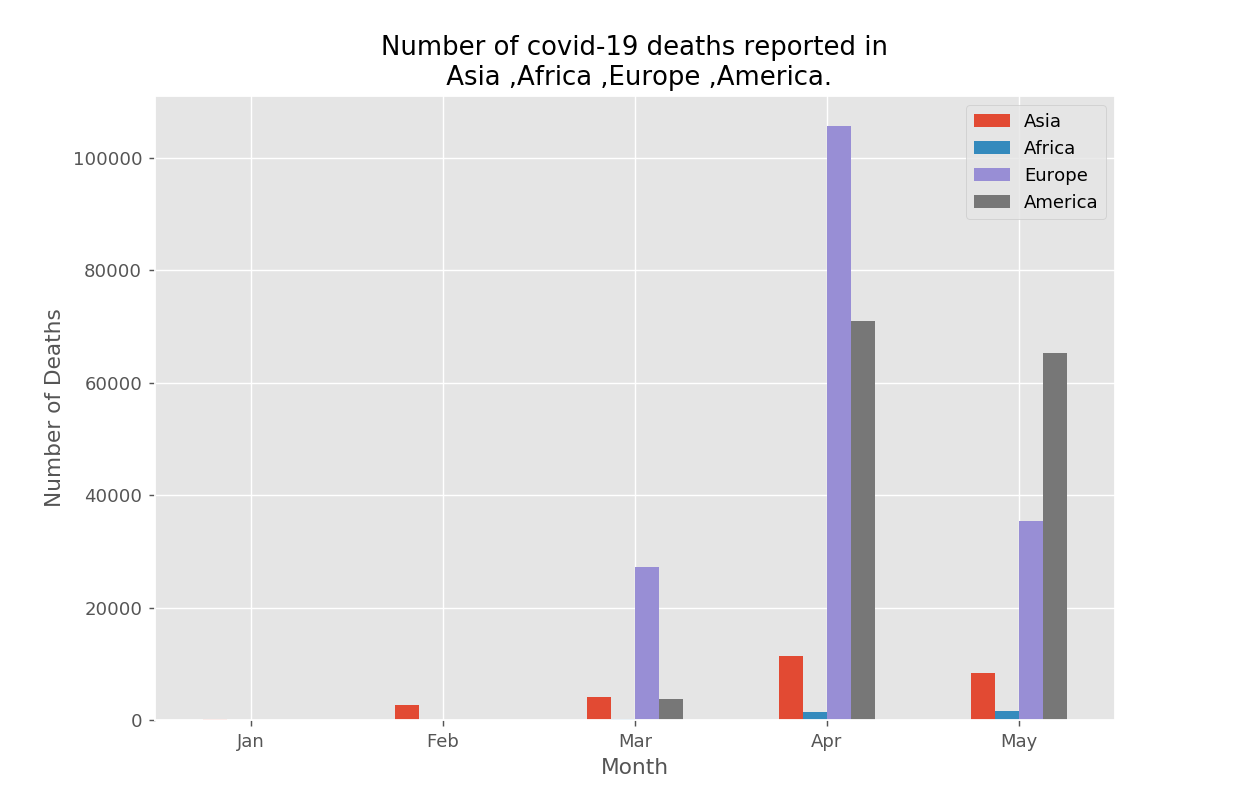

In [93]:
tot.set_index("month").plot(kind ="bar")
plt.title("Number of covid-19 deaths reported in\n Asia ,Africa ,Europe ,America.")
plt.xlabel("Month")
plt.ylabel("Number of Deaths")
plt.xticks(rotation = 0)
plt.show()

In [8]:
asia = df[df["continentExp"]=="Asia"][["month","cases"]]
africa = df[df["continentExp"]=="Africa"][["month","cases"]]
europe= df[df["continentExp"]=="Europe"][["month","cases"]]
america = df[df["continentExp"]=="America"][["month","cases"]]
asia = asia.groupby("month").sum().reset_index()
africa = africa.groupby("month").sum().reset_index()
europe = europe.groupby("month").sum().reset_index()
america = america.groupby("month").sum().reset_index()
asia.rename(columns={"cases":"Asia"}, inplace =True)
africa.rename(columns={"cases":"Africa"}, inplace =True)
europe.rename(columns={"cases":"Europe"}, inplace =True)
america.rename(columns={"cases":"America"}, inplace =True)
tot= asia.merge(africa,on="month")
tot = tot.merge(europe,on="month")
tot = tot.merge(america,on="month")
tot = tot[tot["month"]<6]
tot["month"]= tot["month"].apply(get_month)

<IPython.core.display.Javascript object>


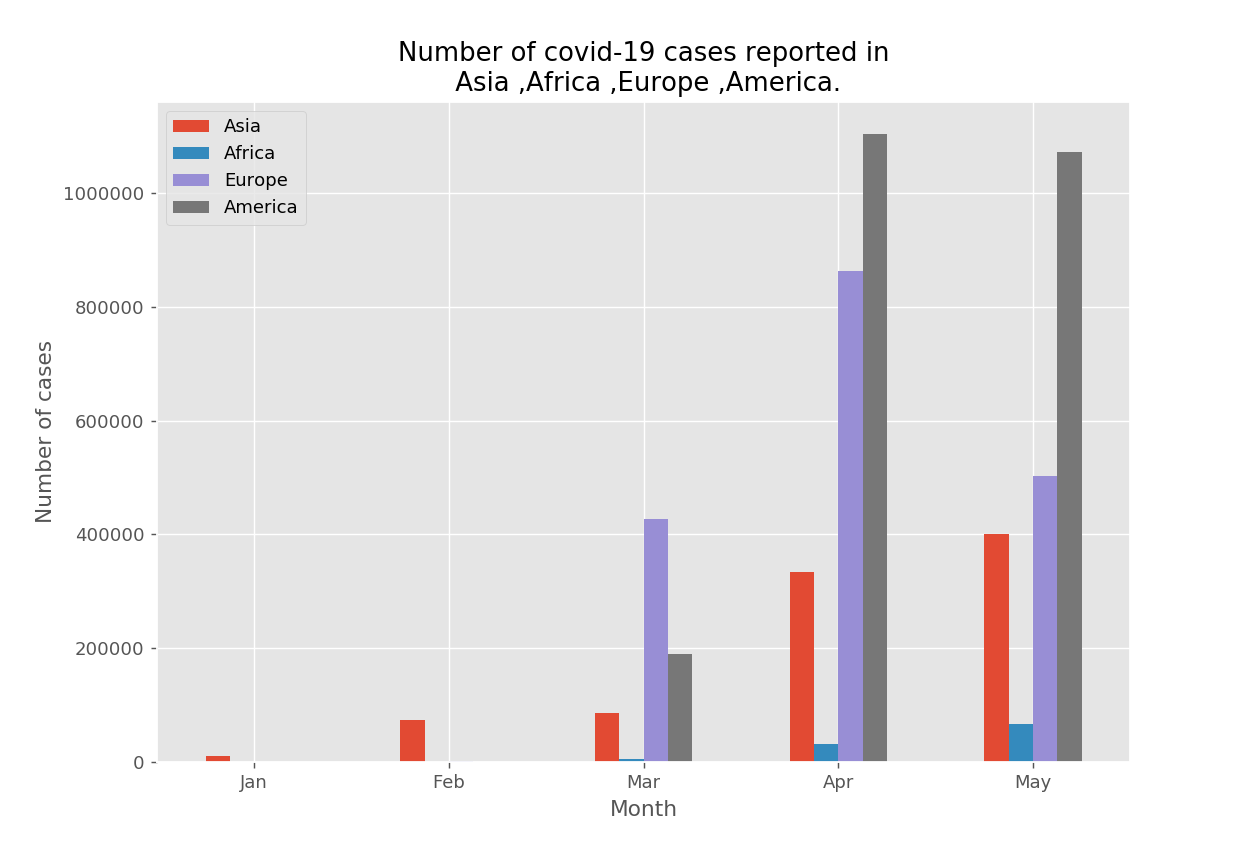

In [9]:
tot.set_index("month").plot(kind ="bar")
plt.title("Number of covid-19 cases reported in\n Asia ,Africa ,Europe ,America.")
plt.xlabel("Month")
plt.ylabel("Number of cases")
plt.xticks(rotation = 0)
plt.show()

In [29]:
df.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2018', 'continentExp'],
      dtype='object')

In [32]:
a =df[df['continentExp']=="Asia"].groupby('countriesAndTerritories').sum().sort_values("cases", ascending =False)["cases"].head(10).values

<IPython.core.display.Javascript object>


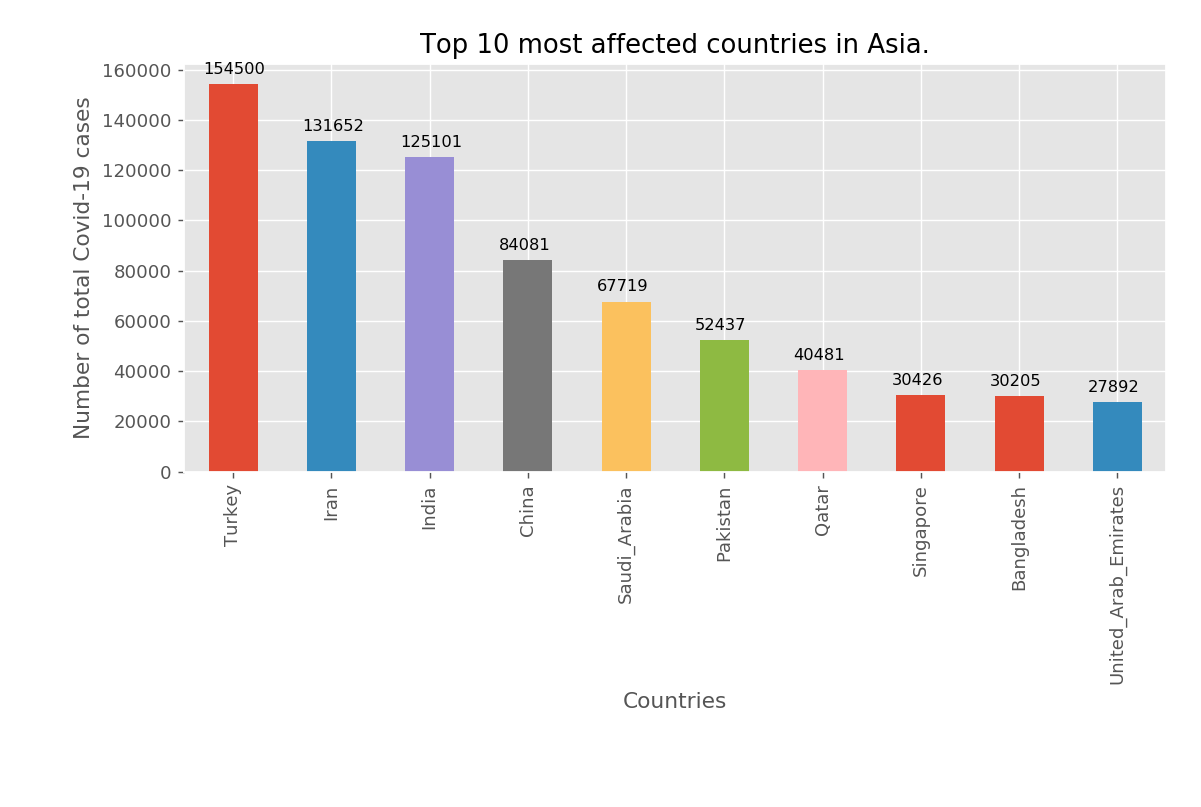

In [36]:
df[df['continentExp']=="Asia"].groupby('countriesAndTerritories').sum().sort_values("cases", ascending =False)["cases"].head(10).plot(kind ="bar")
plt.title("Top 10 most affected countries in Asia.")
for i, v in enumerate(a):
    plt.text(i-0.3,v+4000,str(v), fontsize=9)
plt.xlabel("Countries")
plt.ylabel("Number of total Covid-19 cases")
plt.tight_layout()
plt.show()

In [47]:
top = df[df['continentExp']=="Europe"].groupby('countriesAndTerritories').sum().sort_values("cases", ascending =False)[["cases", "deaths"]].head(10)

In [49]:
deaths = top["deaths"].head(12).values
cases = top["cases"].head(12).values

In [54]:
m = deaths.mean()/cases.mean()

In [58]:
x = np.array([1,350000])
y = m*x

<IPython.core.display.Javascript object>


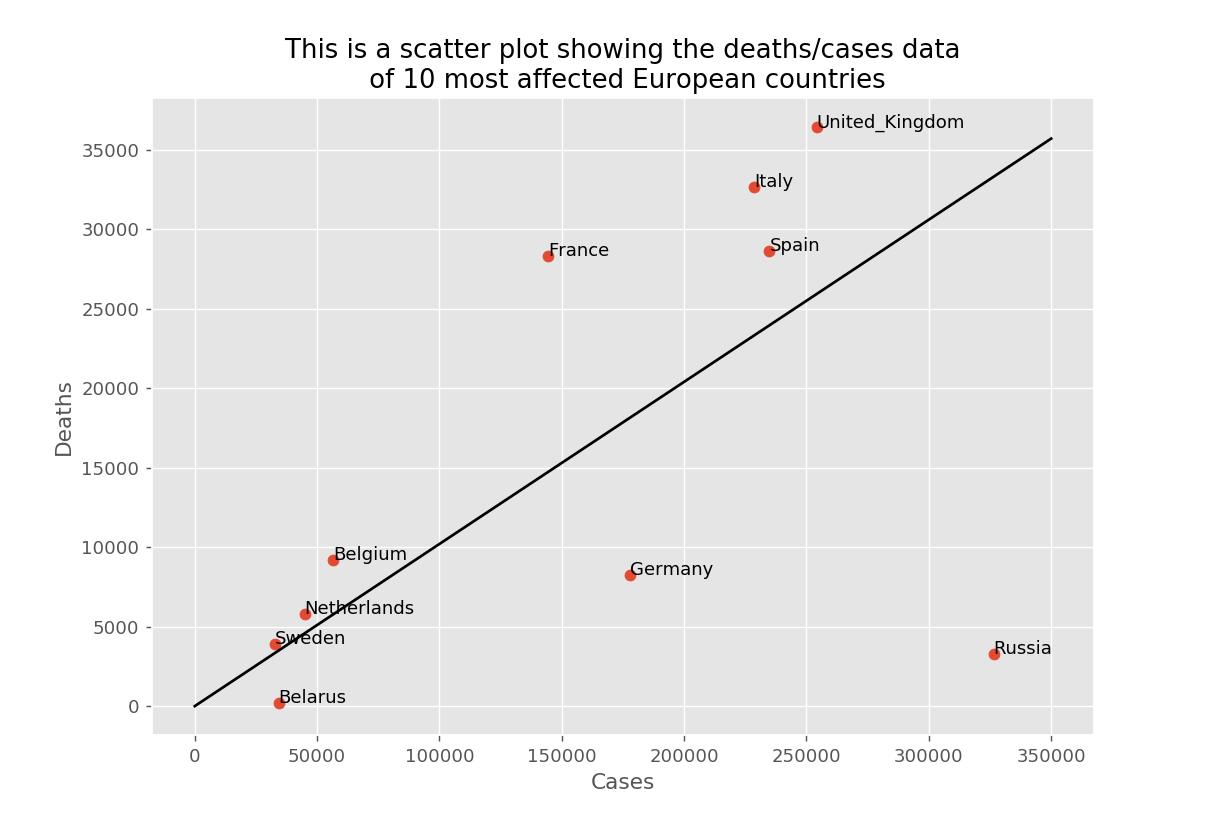

In [61]:
plt.scatter(top["cases"].head(12), top["deaths"].head(12))
for i, txt in enumerate(top.head(12).index):
    plt.annotate(txt,(cases[i],deaths[i]))
plt.plot(x,y ,color ="black")
plt.title("This is a scatter plot showing the deaths/cases data\n of 10 most affected European countries")
plt.xlabel("Cases")
plt.ylabel("Deaths")
plt.show()

## The line in the above plot represents the average deaths/cases in european countries. It is seen that countries like Germany, Russia and Belarus has performed good in containing their number of covid-19 fatalities with respect to their number of cases, while countries like UK ,Italy ,Spain and France seems to have failed in doing so.

In [6]:
df.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2018', 'continentExp'],
      dtype='object')

In [16]:
j = df[df['countriesAndTerritories']== "Japan"][["cases","month"]]

In [17]:
j.shape

(145, 2)

In [45]:
a = np.arange(0,145)

In [19]:
j["d"] = a

In [21]:
j.sort_values("d", ascending =False, inplace =True)

In [22]:
j["d"]=a

In [24]:
plt.style.use('ggplot')
%matplotlib notebook

In [26]:
def get_month(n):
    if n==1:
        return "Jan"
    if n==2:
        return "Feb"
    if n==3:
        return "Mar"
    if n==4:
        return "Apr"
    if n==5:
        return "May"
    if n==12:
        return "Dec"

In [27]:
j["month"] = j["month"].apply(get_month)

In [32]:
s = df[df['countriesAndTerritories']== "South_Korea"][["cases","month"]]
s["d"] = a
s.sort_values("d", ascending =False, inplace =True)
s["d"] = a

In [57]:
i = df[df['countriesAndTerritories']== "Israel"][["cases","month"]]
a = np.arange(0,i.shape[0])

In [58]:
i["d"] = a
i.sort_values("d", ascending =False, inplace =True)
i["d"] = a

In [86]:
tick_labels=["Jan","Feb","Mar","Apr","May"]
names = np.arange(0,5)

<IPython.core.display.Javascript object>


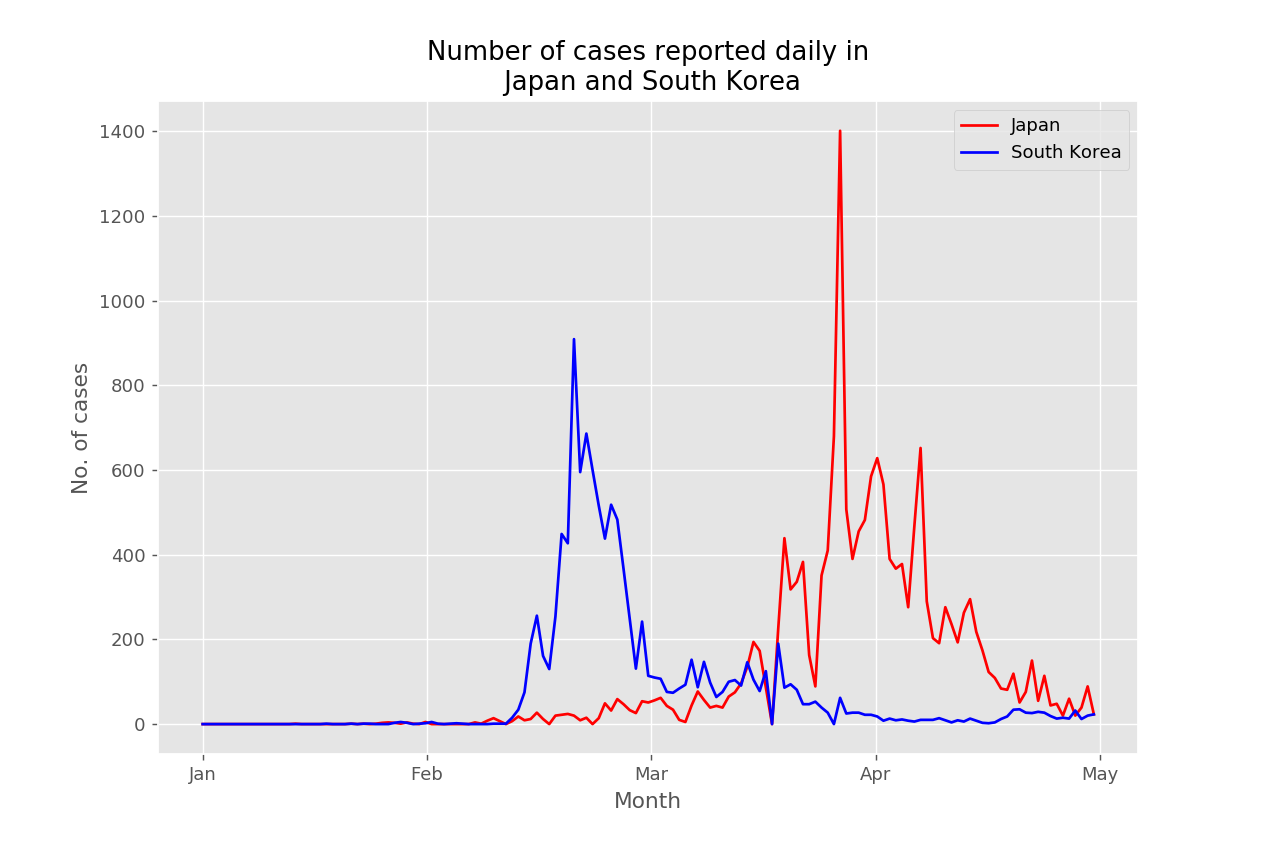

In [64]:
plt.plot(j["d"],j["cases"] ,label = "Japan" ,color ="red")
plt.plot(s["d"],s["cases"] ,label = "South Korea" ,color= "blue")
plt.xticks(np.linspace(0,j.shape[0],5),tick_labels)
plt.xlabel("Month")
plt.ylabel("No. of cases")
plt.title("Number of cases reported daily in\n Japan and South Korea")
plt.legend()
plt.show()

## From the above graph it can be seen that Japan and South korea have been successful in reducing their numbers of fresh covid-19 cases 

## Further we can notice that Japan reached its peak around April and South Korea reached its peak around Feb-March. 

In [82]:
ind = df[df['countriesAndTerritories']== "India"][["cases","month"]]

In [83]:
a=np.arange(0,ind.shape[0])

In [84]:
ind["d"] = a
ind.sort_values("d", ascending =False, inplace =True)
ind["d"] = a

<IPython.core.display.Javascript object>


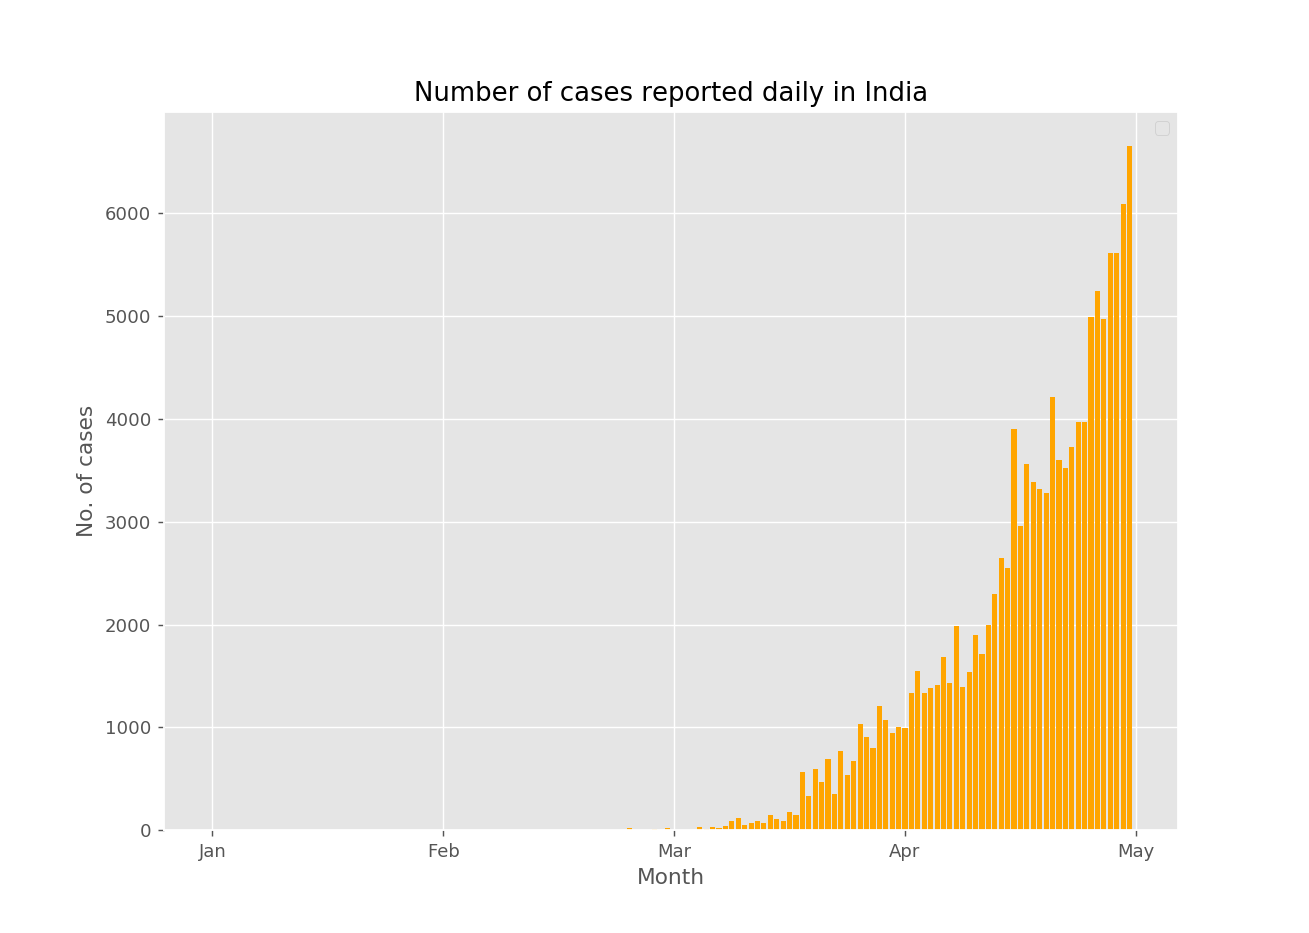

No handles with labels found to put in legend.


In [87]:
plt.bar(ind["d"],ind["cases"], color="orange")
plt.xticks(np.linspace(0,ind.shape[0],5),tick_labels)
plt.xlabel("Month")
plt.ylabel("No. of cases")
plt.title("Number of cases reported daily in India")
plt.legend()
plt.show()

## From the above bar chart it is clear that the number of cases reported per day in India has been increasing at an exponential rate after March.       This situation is quite alarming because the Indian subcontinent houses about 1.7 billion people. 

In [108]:
ind = df[df['countriesAndTerritories']== "India"][["month","cases","deaths"]]

In [109]:
ind["mortality"]=(ind["deaths"]/ind["cases"])*100

In [110]:
ind["month"].replace(12,0 ,inplace =True)

In [111]:
ind=ind.groupby("month").mean()["mortality"].reset_index()

In [113]:
ind["mortality"].replace(np.nan,0 ,inplace=True)

<IPython.core.display.Javascript object>


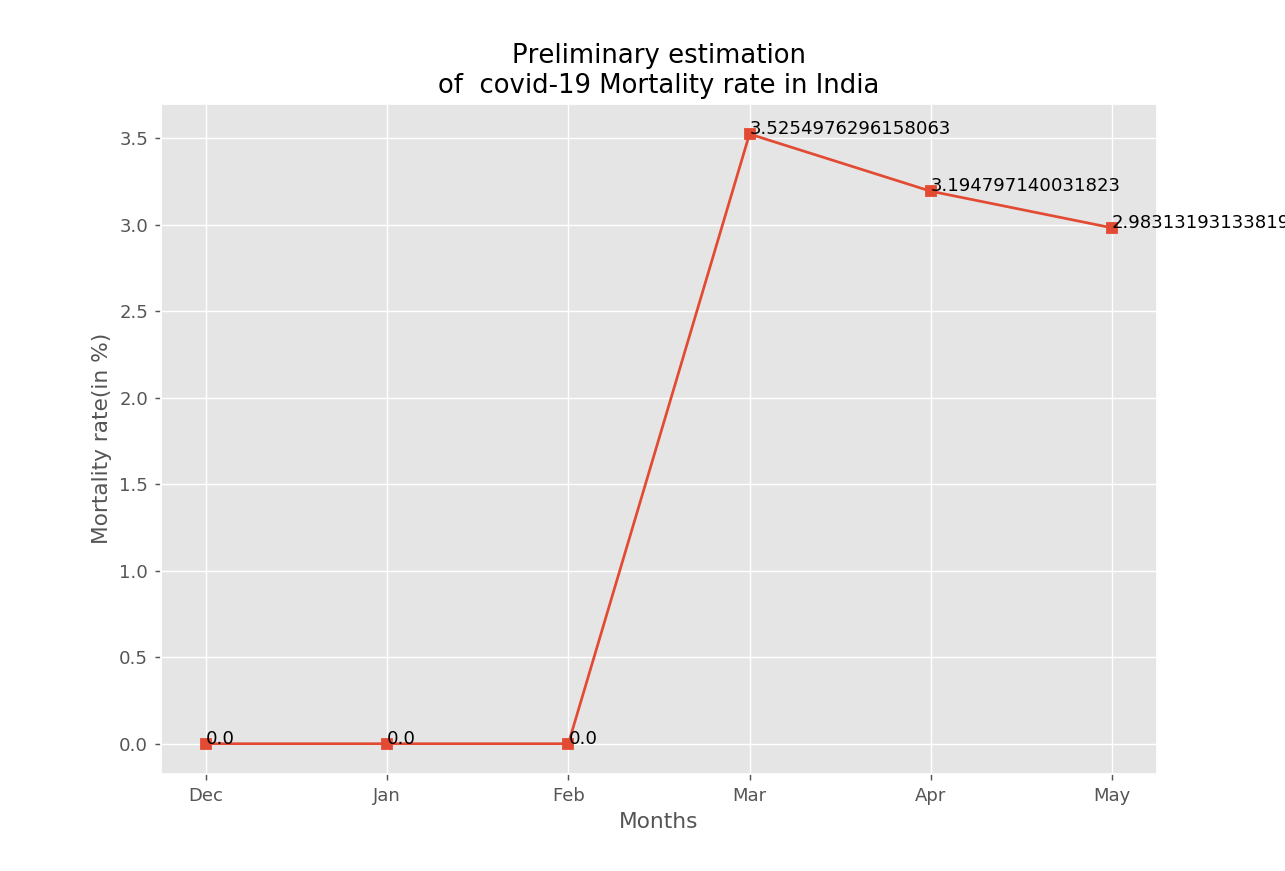

In [119]:
plt.plot(ind["month"],ind["mortality"] ,marker="s")
plt.xticks([0,1,2,3,4,5],["Dec","Jan","Feb","Mar","Apr","May"])
plt.title("Preliminary estimation\nof  covid-19 Mortality rate in India")
plt.ylabel("Mortality rate(in %)")
plt.xlabel("Months")
for i in range(6):
    plt.text(i,ind["mortality"].values[i],ind["mortality"].values[i])

## After the coronavirus outbreak started in India at the end of February ,the mortality rate in India has remained at around 3-3.5% 

In [17]:
plt.style.use("ggplot")
%matplotlib notebook

In [27]:
def mortality(countries):
    for country in countries:
        ind = df[df['countriesAndTerritories']== country[0]][["month","cases","deaths"]]
        ind["mortality"]=(ind["deaths"]/ind["cases"])*100
        ind["month"].replace(12,0 ,inplace =True)
        ind=ind.groupby("month").mean()["mortality"].reset_index()
        ind["mortality"].replace(np.nan,0 ,inplace=True)
        plt.plot(ind["month"],ind["mortality"] ,marker="o" ,color = country[1],label = country[0])
    plt.xticks([0,1,2,3,4,5],["Dec","Jan","Feb","Mar","Apr","May"])
    plt.legend()
    plt.xlabel("Month")
    plt.ylabel("Mortality Rate (in %)")
    plt.title("Covid-19 Mortality Rate of top 6 most infected countries")
    plt.show()

In [ ]:
 countries = [('United_States_of_America',"blue"),("Brazil","green"),('Russia',"red"),("Italy","orange"),("Spain", "violet"),("United_Kingdom","black")]

<IPython.core.display.Javascript object>


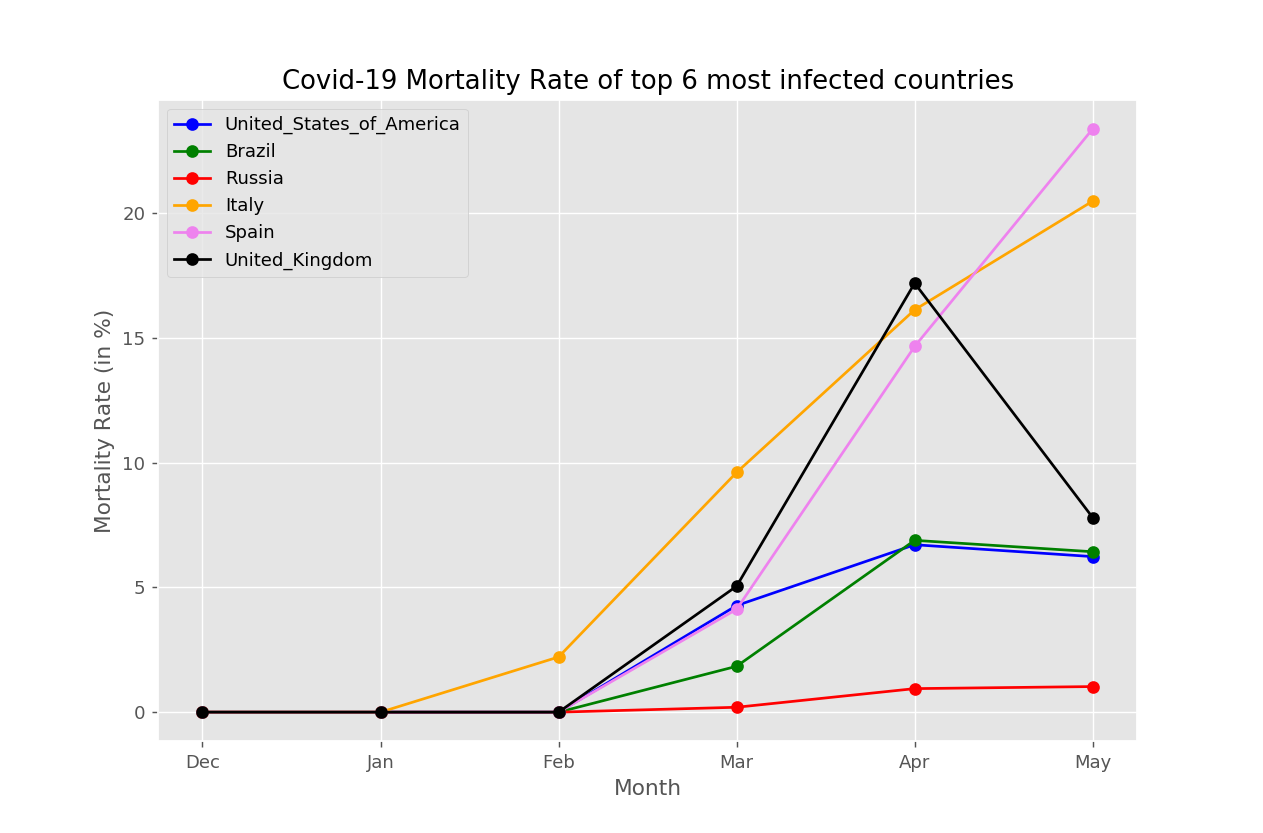

In [29]:
mortality(countries)

## There is a dip in mortality rate in UK from April to May. Spain and Italy has crossed the mortality rate of 20% in May.
## Russia has the lowest mortality rate among the other top countries. 

In [63]:
w = df[["month","cases","deaths"]]

In [64]:
w["month"].replace(12,0, inplace =True)

C:\Users\Sritiman Adak\python\lib\site-packages\pandas\core\generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [65]:
w = w.groupby("month").sum()

In [66]:
w["mortality"] = (w["deaths"]/w["cases"])*100

<IPython.core.display.Javascript object>


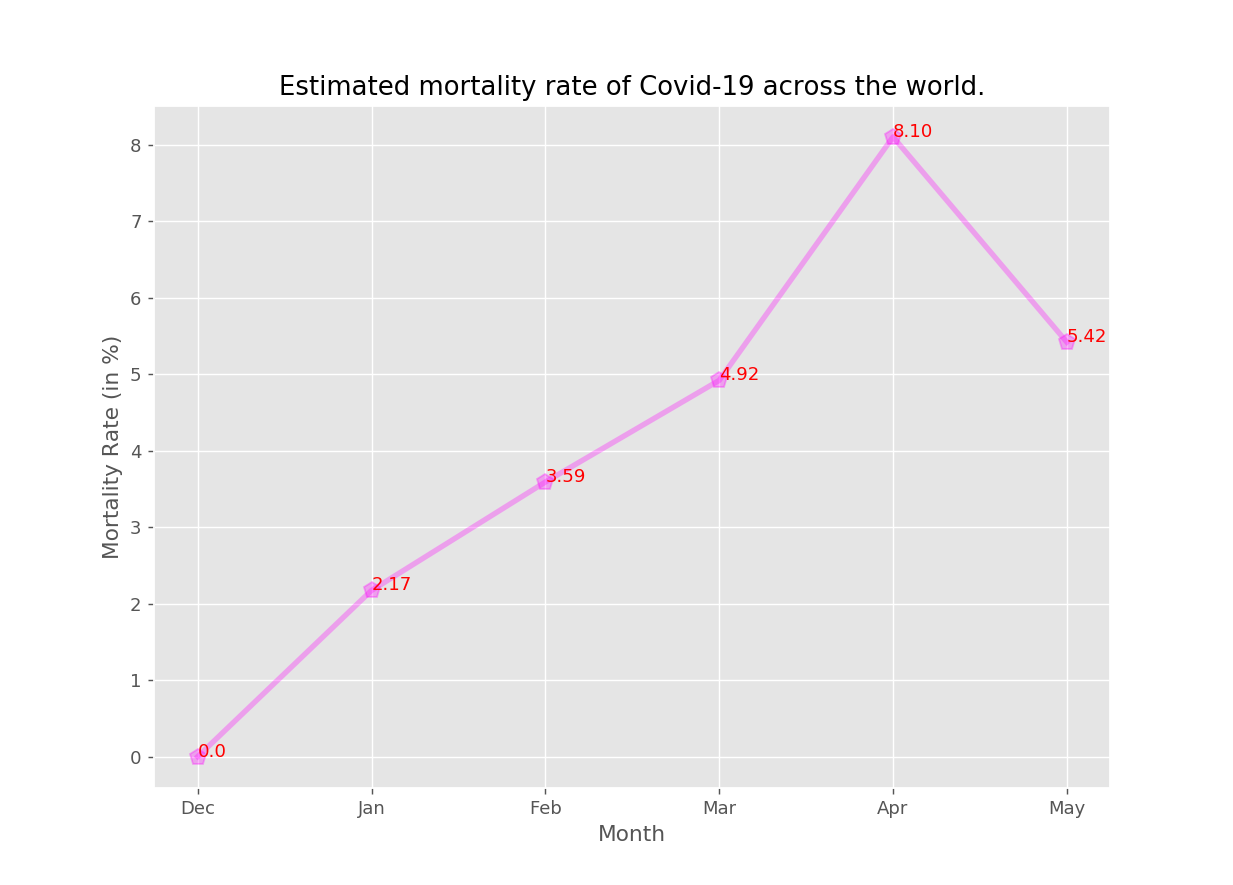

([<matplotlib.axis.XTick at 0x18a2c314b00>,
 <a list of 6 Text xticklabel objects>)

In [81]:
w["mortality"].plot(marker ="p" ,linewidth = 3 ,ms = 9, color ="magenta",alpha = 0.3)
plt.title("Estimated mortality rate of Covid-19 across the world.")
plt.xlabel("Month")
plt.ylabel("Mortality Rate (in %)")
for i,v in enumerate(w["mortality"].values):
    plt.text(i,v, str(v)[:4], color ="red")
plt.xticks(np.arange(0,6),["Dec","Jan","Feb","Mar","Apr","May"])    

## Covid-19 mortality rate went up to about  8.10% in April, again came back to 5.42% in May